# DIG_IMG_SEGMENTATION
## 6031040921 Phatcharapon Jumruspun

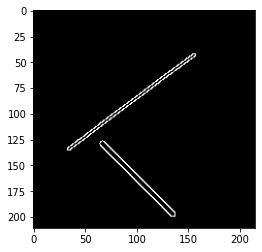

(-141.4213562373095, 141.4213562373095)

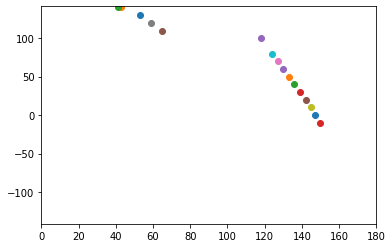

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('2lines.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)
plt.imshow(edges, cmap='gray')
plt.show()
lines = cv2.HoughLines(edges, 10, np.pi/180, 100)

linesdegree = lines.copy()
linesdegree[:, 0:1, 1:2] = linesdegree[:, 0:1, 1:2]*180/np.pi

# use scatter plot
for i in range(0, len(linesdegree)):
  plt.scatter(linesdegree[i, 0:1, 1:2], linesdegree[i, 0:1, 0:1])

# set x,y limits
plt.xlim(0, 180)
plt.ylim(-100*np.sqrt(2), 100*np.sqrt(2))

# QUESTION 1 - FindLines

1. Does Laplacian of Gaussian to detect edges
2. Threshold the image
3. Hough transform the thresholded image

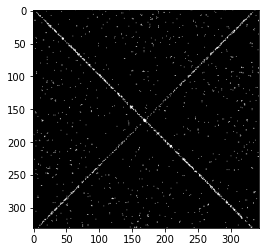

(-141.4213562373095, 141.4213562373095)

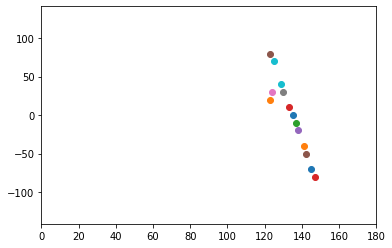

In [ ]:
laplacian = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

img = cv2.imread('findLines.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


gaussian = cv2.GaussianBlur(gray, (9, 9), 0)

log = cv2.filter2D(gaussian, -1, laplacian)
ret, thresh1 = cv2.threshold(log, 8, 255, cv2.THRESH_BINARY)

plt.imshow(thresh1, cmap='gray')
plt.show()
lines = cv2.HoughLines(thresh1, 10, np.pi/180, 100)

linesdegree = lines.copy()
linesdegree[:, 0:1, 1:2] = linesdegree[:, 0:1, 1:2]*180/np.pi

# use scatter plot
for i in range(0, len(linesdegree)):
  plt.scatter(linesdegree[i, 0:1, 1:2], linesdegree[i, 0:1, 0:1])

# set x,y limits
plt.xlim(0, 180)
plt.ylim(-100*np.sqrt(2), 100*np.sqrt(2))

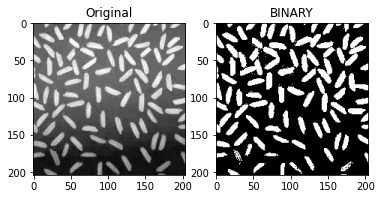

In [ ]:
img = cv2.imread('bacteria.png', 0)
ret, thresh1 = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)

plt.subplot(1,2,1)
plt.imshow(img, 'gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(thresh1, 'gray')
plt.title("BINARY")
plt.show()

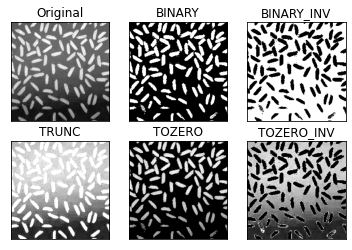

In [ ]:
img = cv2.imread('bacteria.png', 0)
ret, thresh1 = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 125, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 125, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 125, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])
plt.show()

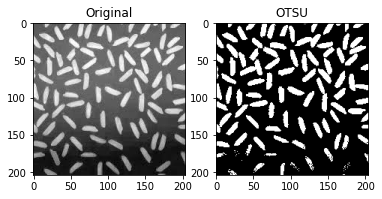

In [ ]:
img = cv2.imread('bacteria.png', 0)
ret, thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

plt.subplot(1,2,1)
plt.imshow(img, 'gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(thresh1, 'gray')
plt.title("OTSU")
plt.show()

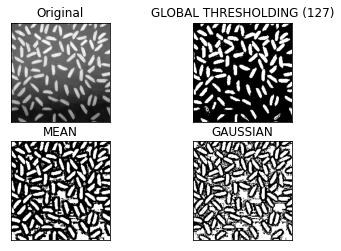

In [ ]:
img = cv2.imread('bacteria.png', 0)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original', 'GLOBAL THRESHOLDING (127)', 'MEAN', 'GAUSSIAN']
images = [img, thresh1, th2, th3]
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])
plt.show()

# QUESTION 2 - THRESHOLDING

1. Using OTSU seems to yield the best result, due to the dynamic change in background colors for each section of the picture

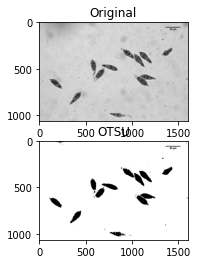

In [ ]:
img = cv2.imread('ra.jpg', 0)
ret, thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

plt.subplot(2,1,1)
plt.imshow(img, 'gray')
plt.title("Original")
plt.subplot(2,1,2)
plt.imshow(thresh1, 'gray')
plt.title("OTSU")
plt.show()